In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import pandas_profiling as pp

In [3]:
pwd

'C:\\Users\\mateu'

In [4]:
df_battles = pd.read_csv(r'C:\Users\mateu\OneDrive\Área de Trabalho\Mateus\dados\game-of-thrones\battles.csv') # usar 'r' no começo
df_battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
pp.ProfileReport(df_battles)

Number of variables,25
Number of observations,38
Total Missing (%),31.6%
Total size in memory,7.5 KiB
Average record size in memory,202.1 B
Numeric,6
Categorical,15
Boolean,0
Date,0
Text (Unique),1
Rejected,3


In [6]:
df_deaths = pd.read_csv('C:/Users/mateu/OneDrive/Área de Trabalho/Mateus/dados/game-of-thrones/character-deaths.csv') #usar barras para direita
#df_deaths.head()

# Analisar os tipos de Batalha - geral, para cada ano, lugar, general(ataque e defesa), tamanho da tropa(ataque e defesa)

#### Tipos de batalhas - graficos 1 e 2

In [14]:
#df_battles.battle_type
#df_battles.loc[[range()], ['name', 'year', 'battle_type']]
battles_type = df_battles[['name', 'year', 'battle_type', 'summer', 'attacker_commander']].dropna(axis=0, how='any').copy()      #https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
                                                                                    #dropna para retirar linhas de valores nulos
battles_type = battles_type.replace(['pitched battle', 'ambush', 'siege', 'razing'], ['Batalha campal', 'Emboscada', 'Cerco', 'Devastar']) # subistituir termos
#battles_type   # Tipos de batalhas para analise dos graficos 1 e 2


#### Comandante e tipos de batalhas adotadas por cada um
O objetivo é verificar se existe um padrão em como um comandante gosta de atacar


In [101]:
commander_size = df_battles[['name', 'battle_type', 'attacker_commander', 'defender_commander', 'attacker_size', 'defender_size']].copy() #.dropna(axis=0, how='any')

genres = df_battles['attacker_commander'].str.cat(sep=', ').split(', ')#.sort()#.unique()
len(genres)
len(list(set(genres)))
genres = sorted(list(set(genres)))

#genres
#commander_size

In [87]:
commander = pd.DataFrame(columns=['Generais_Ataque', 'Batalha_campal', 'Emboscada', 'Cerco', 'Devastar'])
commander.Generais_Ataque = [genres[x] for x in range(len(genres))]
commander.head()

,Generais_Ataque,Batalha_campal,Emboscada,Cerco,Devastar
0,Addam Marbrand,NaN,NaN,NaN,NaN
1,Alysane Mormot,NaN,NaN,NaN,NaN
2,Andros Brax,NaN,NaN,NaN,NaN
3,Asha Greyjoy,NaN,NaN,NaN,NaN
4,Black Walder Frey,NaN,NaN,NaN,NaN


#### batalha numeros
verificar se existe um tipo de batalha pra a proporção de ataque pela defesa

In [107]:
    commander_size.loc[:, 'A/D'] = commander_size.attacker_size/commander_size.defender_size
    commander_size#.head()
commander_size.dropna(subset=['A/D', 'battle_type']).sort_values(by='battle_type')

,name,battle_type,attacker_commander,defender_commander,attacker_size,defender_size,A/D
4,Battle of the Whispering Wood,ambush,"Robb Stark, Brynden Tully",Jaime Lannister,1875.0,6000.0,0.312500
5,Battle of the Camps,ambush,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",6000.0,12625.0,0.475248
13,Sack of Winterfell,ambush,"Ramsay Snow, Theon Greyjoy","Rodrik Cassel, Cley Cerwyn, Leobald Tallhart",618.0,2000.0,0.309000
14,Battle of Oxcross,ambush,"Robb Stark, Brynden Tully","Stafford Lannister, Roland Crakehall, Antario ...",6000.0,10000.0,0.600000
17,Sack of Harrenhal,ambush,"Roose Bolton, Vargo Hoat, Robett Glover",Amory Lorch,100.0,100.0,1.000000
25,The Red Wedding,ambush,"Walder Frey, Roose Bolton, Walder Rivers",Robb Stark,3500.0,3500.0,1.000000
0,Battle of the Golden Tooth,pitched battle,Jaime Lannister,"Clement Piper, Vance",15000.0,4000.0,3.750000
2,Battle of Riverrun,pitched battle,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",15000.0,10000.0,1.500000
3,Battle of the Green Fork,pitched battle,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",18000.0,20000.0,0.900000
10,Battle of Torrhen's Square,pitched battle,"Rodrik Cassel, Cley Cerwyn",Dagmer Cleftjaw,244.0,900.0,0.271111


In [115]:
    df_battles.loc[:, 'A/D'] = df_battles.attacker_size/df_battles.defender_size
    commander_size#.head()
Teste = df_battles.dropna(subset=['A/D'])#.sort_values(by='battle_type')
Teste[['name', 'attacker_outcome', 'battle_type', 'attacker_size', 'defender_size', 'A/D']]

,name,attacker_outcome,battle_type,attacker_size,defender_size,A/D
0,Battle of the Golden Tooth,win,pitched battle,15000.0,4000.0,3.750000
2,Battle of Riverrun,win,pitched battle,15000.0,10000.0,1.500000
3,Battle of the Green Fork,loss,pitched battle,18000.0,20000.0,0.900000
4,Battle of the Whispering Wood,win,ambush,1875.0,6000.0,0.312500
5,Battle of the Camps,win,ambush,6000.0,12625.0,0.475248
10,Battle of Torrhen's Square,win,pitched battle,244.0,900.0,0.271111
13,Sack of Winterfell,win,ambush,618.0,2000.0,0.309000
14,Battle of Oxcross,win,ambush,6000.0,10000.0,0.600000
15,Siege of Storm's End,win,siege,5000.0,20000.0,0.250000
16,Battle of the Fords,loss,pitched battle,20000.0,10000.0,2.000000


<h2><font Face=Times COLOR="Red">Pensar em uma forma de analisar isso</font></h2>
vitorias de acordo com a vantagem numerica e os tipos de batalhas

#### Batalhas por região
Verificar se existe um região ou lugar mais propicia para determinados tipos de batalhas

#### Teste e Suporte

In [8]:
#a = battles_type.battle_type.unique()
a = battles_type.groupby(['year', 'battle_type']).battle_type.agg([len]).reset_index()
#c = battles_type.battle_type.unique()
#for x in c:
 #   if (battles_type.year==298 & battles_type.battle_type==x):
  #   
a

,year,battle_type,len
0,298,Batalha campal,4
1,298,Emboscada,3
2,299,Batalha campal,6
3,299,Cerco,5
4,299,Emboscada,7
5,300,Batalha campal,2
6,300,Cerco,6
7,300,Devastar,2


### Gráficos

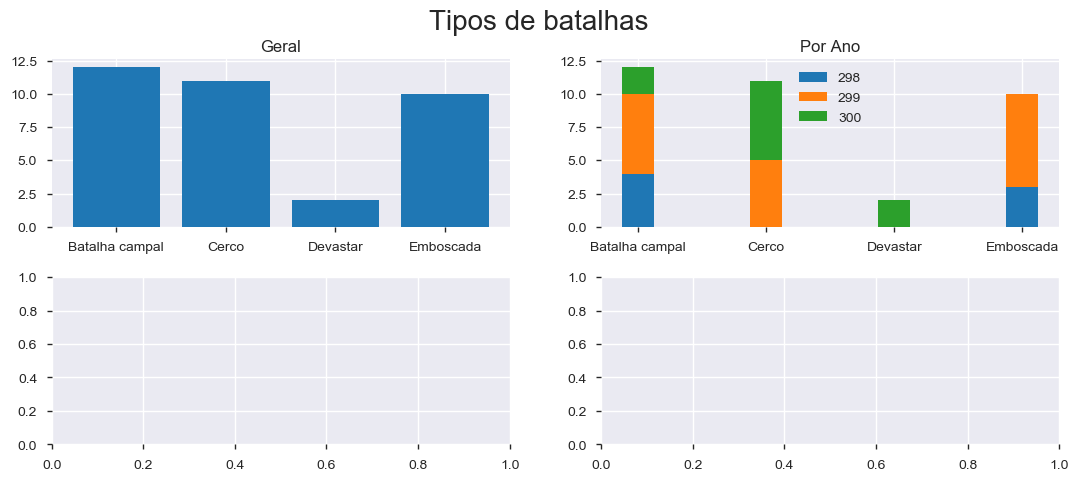

In [9]:
#_ = death_preds.actual.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Alive", "Deceased"])
#_ = battles_type.battle_type.value_counts().plot.bar()
fig, axs = plt.subplots(2, 2, figsize=(13, 5), dpi=100)
fig.suptitle('Tipos de batalhas', fontsize=20)
fig.subplots_adjust(hspace=0.3)

#parametros
Tipos = battles_type.battle_type.sort_values().unique()
Anos = battles_type.year.sort_values().unique()
y = list()
for Ano in Anos:
    i = list(map(lambda x: battles_type.loc[(battles_type.battle_type==x) & (battles_type.year==Ano)]['name'].count(), Tipos))
    y.append(i)
    
# grafico 1 - quntidade de cada tipo de batalhas
axs[0, 0].bar(Tipos, battles_type.groupby('battle_type', sort=True).count().name)
axs[0, 0].set_title('Geral')

# grafico 2 - tipos de batalha por ano
axs[0, 1].bar(Tipos, y[0], width = 0.25)  #298
axs[0, 1].bar(Tipos, y[1], width = 0.25, bottom=y[0])  #299
axs[0, 1].bar(Tipos, y[2], width = 0.25, bottom=list(map(sum, zip(y[0], y[1]))))  #300
axs[0, 1].set_title('Por Ano')
axs[0, 1].legend([str(ano) for ano in Anos], loc='upper center')

# grafico 3 - 
#xs[1, 1].bar(x, y[0], color = 'gold', width = 0.25)  #298
#xs[1, 1].bar(x, y[1], color = 'b', width = 0.25, bottom=y[0])  #299
#xs[1, 1].bar(x, y[2], color = 'g', width = 0.25, bottom=list(map(sum, zip(y[0], y[1]))))  #300
#xs[1, 1].set_title('Por Ano')
#xs[1, 1].legend([str(ano) for ano in Anos])
#
#https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

In [10]:
p = df_battles.groupby('year').sum()#[["major_death", "major_capture"]]
p

,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
year,,,,,,,,
298,28,0.0,0.0,4.0,3.0,55875.0,52745.0,7.0
299,350,0.0,0.0,8.0,6.0,66746.0,59750.0,19.0
300,363,0.0,0.0,1.0,2.0,116000.0,9640.0,0.0


#### Coisas para fazer
- Embelezar graficos
    - Cores
    - textos
    - Eixos
    - fundo
    - 
- Usar Markdown
    - Escrever os passos
    - colocar imagens
- Publicar

#### Estudar efetividade

---

<h1><center><b><br>Área de Testes</b></center></h1>

---


In [11]:
Tipos = battles_type.battle_type.sort_values().unique()
Anos = battles_type.year.sort_values().unique()
y = list()
for Ano in Anos:
    i = list(map(lambda x: battles_type.loc[(battles_type.battle_type==x) & (battles_type.year==Ano)]['name'].count(), Tipos))
    y.append(i)
y[0] + y[2]
Anos
[str(ano) for ano in Anos]


['298', '299', '300']

In [12]:
#battles_type.groupby('year').count()
#battles_type.loc[battles_type.year==300]

bt_year = battles_type[['year', 'battle_type']].groupby('battle_type')['year'].value_counts()
bt_year
battles_type.year.unique()
battles_type.groupby('year').count().name
battles_type.groupby('battle_type').count().name
battles_type.battle_type.unique()


array(['Batalha campal', 'Emboscada', 'Cerco', 'Devastar'], dtype=object)